<a href="https://colab.research.google.com/github/SierraKilo/DS200_assignment/blob/main/M5Q3_shubhamkumar_20936.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Q3. Perform some basic analysis using Google Colab on datasets select from https://data.gov.in/.



*   Create these relevant plots using MatPlotLib:
  *   Scatter plot
  *   Box plot
  *   Bar or line plot

*   Create public github repo for your data science project.
*   Upload the plots and the Python scripts you wrote to this repository.
*   Include a Readme.md documentation for the same listing the data sources, the observations and analysis from the plots, including citations.
*   **Upload a link to the public github repo on MS Form.**


In [ ]:
""""
The data set has been taken from https://data.gov.in/files/ogdpv2dms/s3fs-public/datafile/Annex_7.4_RTYB_2006-2015.csv and depicts the Sales of Motor Vehicles in India Including Exports from 2006-07 to 2014-15.
"""

In [ ]:
# Load all packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
## Load the csv file
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Assignments/DS200/Annex_7.4_RTYB_2006-2015.csv')
df.fillna(0, inplace=True)
data = df

## Transform the file
df = df.melt(id_vars=['Category'])

## Filter out Grand Total, Total Two-Wheelers and Total Commercial Vehicles from Analysis
df = df[df['Category']!='GRAND TOTAL']
df = df[df['Category']!='Total Two-Wheelers']
df = df[df['Category']!='Total Commercial Vehicles']

## Rename Columns appropriately
df.columns = ['Vehicle Category', 'Year', 'Vehicles Sold']

df.head()

,Vehicle Category,Year,Vehicles Sold
0,M & HCVs,2006-07,294166.0
1,LCVs,2006-07,223136.0
3,Passenger Cars,2006-07,1269305.0
4,Multi-Utility Vehicles,2006-07,309126.0
5,Scooters,2006-07,976014.0


# Scatter Plot

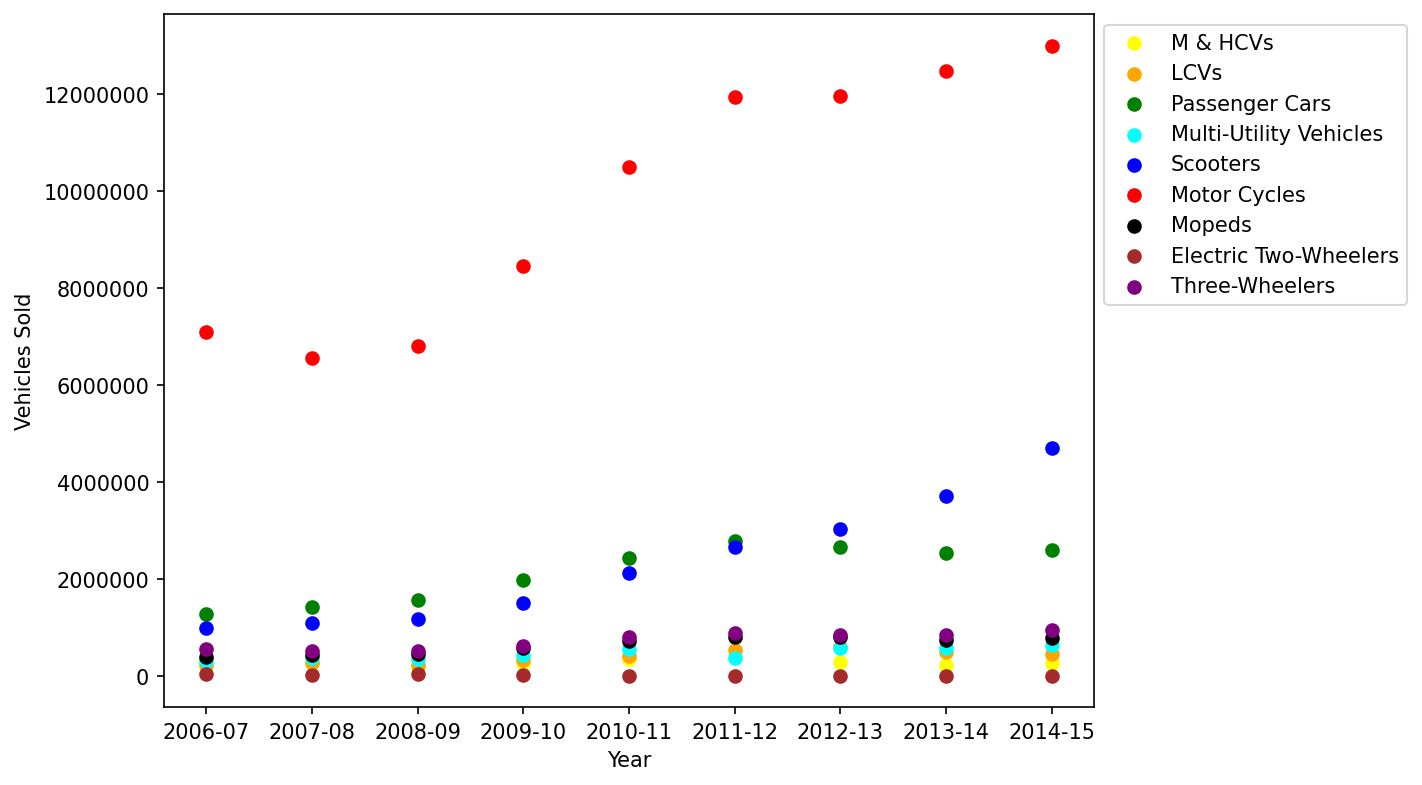

In [ ]:
# Get unique vehicle categories
vehicle_categories = df['Vehicle Category'].unique()

# Define colors for each category (you can specify your own colors)
colors = ['yellow', 'orange', 'green', 'cyan', 'blue', 'red', 'black', 'brown', 'purple']

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8,6),dpi=150)

# Iterate through categories and create scatter plots with different colors
for i, category in enumerate(vehicle_categories):
    category_data = df[df['Vehicle Category'] == category]
    ax.scatter(x=category_data['Year'], y=category_data['Vehicles Sold'], label=category, color=colors[i])

ax.set_xlabel('Year')
ax.set_ylabel('Vehicles Sold')

# Move Legend to Upper Left
ax.legend(loc="upper left", bbox_to_anchor=(1, 1))

# Display full values
ax.ticklabel_format(style='plain', axis='y')

# Show the plot
plt.show()

In [ ]:
"""
Inference from Scatter Plot -

1. The sales of Motorcycles, scooters and passenger cars have been increasing during the period of our analysis.
However, the sales of other vehicles have been constant during the period of our analysis.

2. The sales of motorcycles have been the highest amongst all the vehicles and are almost 5 times the sales of scooters/ passenger cars which are the
second-most sold vehicles.
"""

# Box Plot

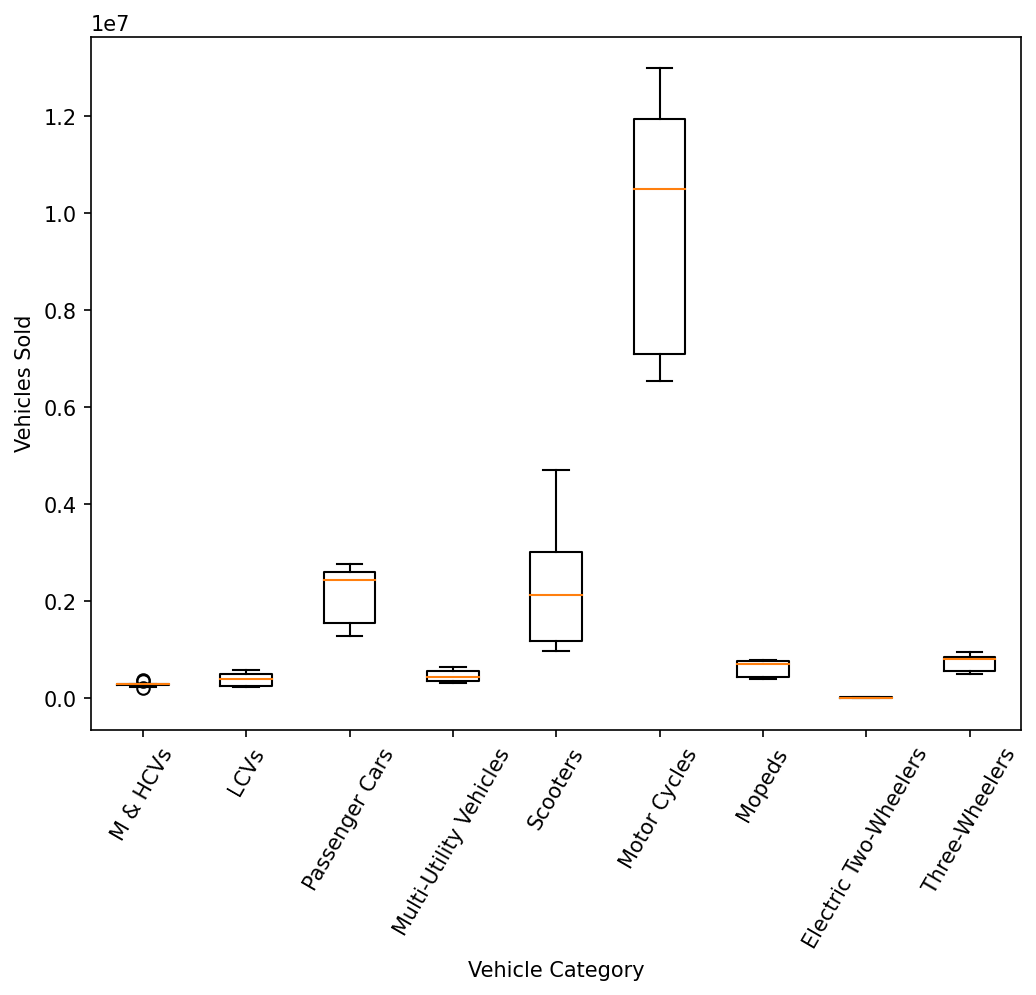

In [ ]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(8,6),dpi=150)

# Create the box plot using Matplotlib
ax.boxplot([df[df['Vehicle Category'] == category]['Vehicles Sold'] for category in df['Vehicle Category'].unique()],
           labels=df['Vehicle Category'].unique())

# Rotate the x-axis labels
plt.xticks(rotation=60)

# Set the axis labels
ax.set_xlabel('Vehicle Category')
ax.set_ylabel('Vehicles Sold')

# Show the plot
plt.show()

In [ ]:
"""
Inference from Box Plot - Box plot is method to graphically show the spread of a numerical variable through quartiles.

1. From the above plot, we can infer that the Inter Quartile Range represented by the height of the box plot is more for
sale of Motorcycles, Scooters and Passenger Cars, whereas it is minimal for all other vehicle types with the IQR of
Electric Two-Wheelers and M&HCVs being the minimum.

"""

# Cluster Bar Plot

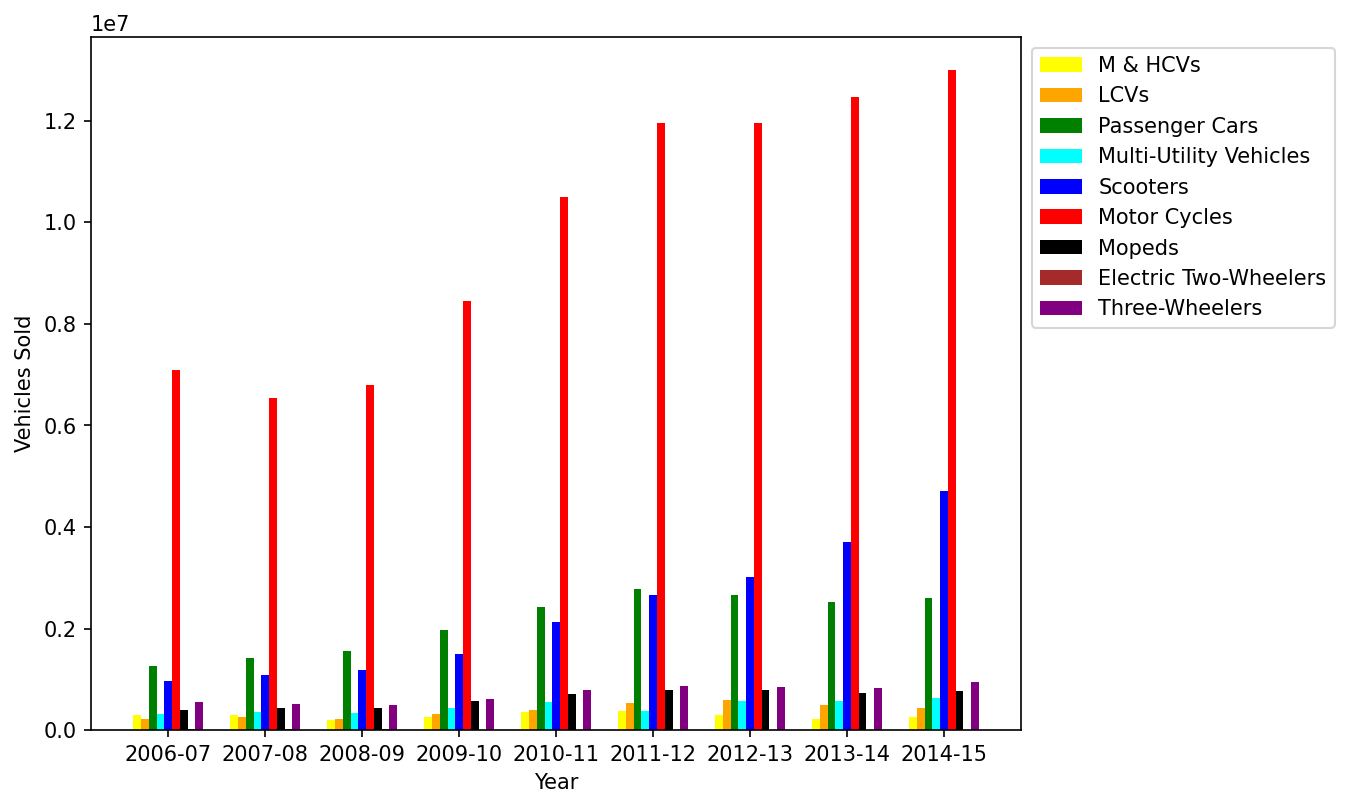

In [ ]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(8,6),dpi=150)

# Get unique years and sort them
years = np.sort(df['Year'].unique())

# Calculate the width of each bar based on the number of categories
bar_width = 0.08

# Create a bar for each category with different colors
for i, category in enumerate(vehicle_categories):
    category_data = df[df['Vehicle Category'] == category]
    category_values = [category_data[category_data['Year'] == year]['Vehicles Sold'].sum() for year in years]

    # Offset the x position to separate bars for each category
    x = np.arange(len(years)) + i * bar_width

    # Create the bar
    ax.bar(x, category_values, width=bar_width, label=category, color=colors[i])

# Set x-axis ticks and labels
ax.set_xticks(np.arange(len(years)) + (len(vehicle_categories) - 1) * bar_width / 2)
ax.set_xticklabels(years)

# Set axis labels
ax.set_xlabel('Year')
ax.set_ylabel('Vehicles Sold')

# Add a legend
ax.legend(loc="upper left", bbox_to_anchor=(1, 1))

# Show the plot
plt.show()

In [ ]:
"""
Inference from Cluster Bar Plot -

1. The sales of Motorcycles, scooters and passenger cars have been increasing during the period of our analysis.
However, the sales of other vehicles have been constant during the period of our analysis.

2. The sales of motorcycles have been the highest amongst all the vehicles and are almost 5 times the sales of scooters/ passenger cars which are the
second-most sold vehicles.

3. The sales of Electric Two-Wheelers have not picked up during the period of analysis.
"""

# Line Plot

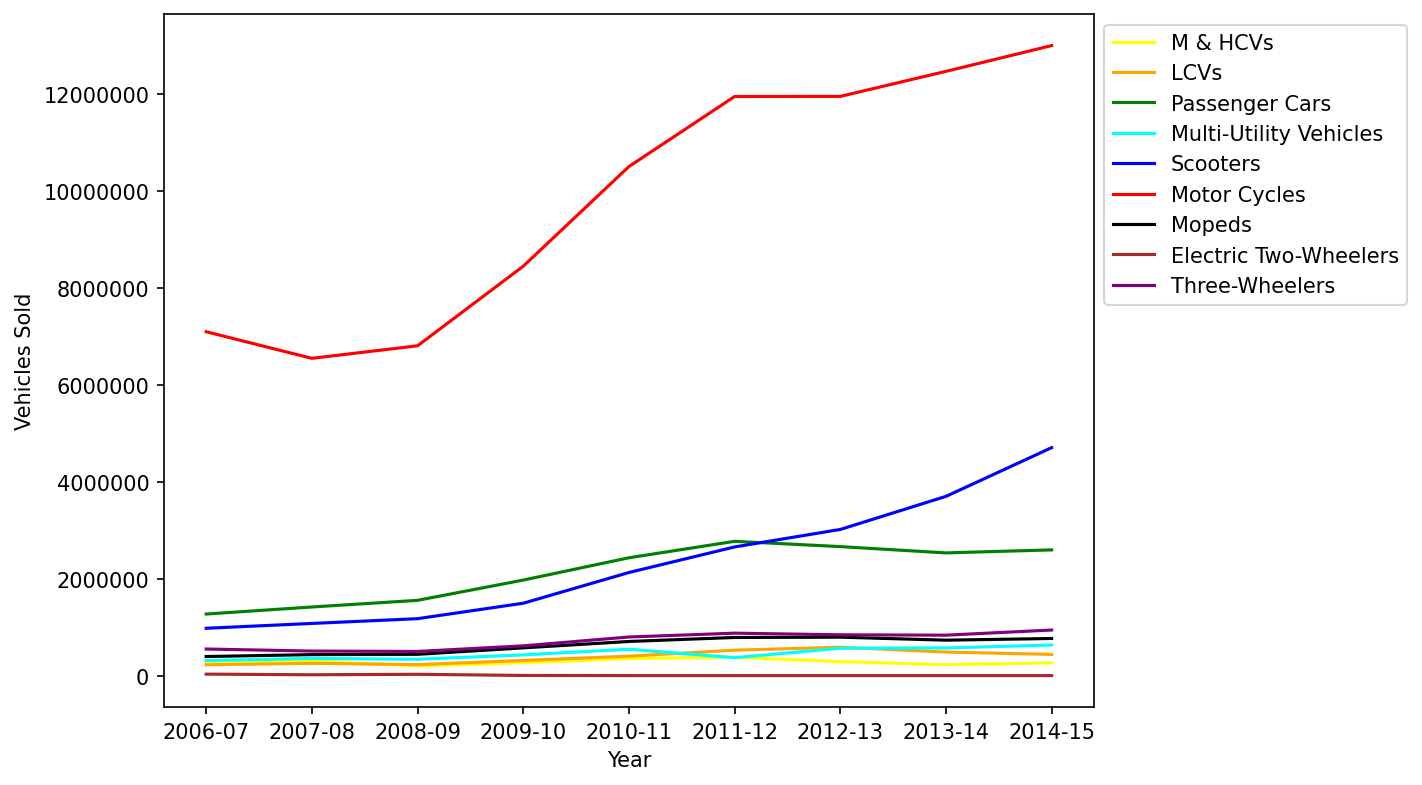

In [ ]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(8,6),dpi=150)

# Iterate through categories and create scatter plots with different colors
for i, category in enumerate(vehicle_categories):
    category_data = df[df['Vehicle Category'] == category]
    ax.plot(category_data['Year'], category_data['Vehicles Sold'], label=category, color=colors[i])

ax.set_xlabel('Year')
ax.set_ylabel('Vehicles Sold')

# Move Legend to Upper Left
ax.legend(loc="upper left", bbox_to_anchor=(1, 1))

# Display full values
ax.ticklabel_format(style='plain', axis='y')

# Show the plot
plt.show()

In [ ]:
"""
Inference from Line Plot -

1. The sales of Motorcycles, scooters and passenger cars have been increasing during the period of our analysis.
However, the sales of other vehicles have been constant during the period of our analysis.

2. The sales of motorcycles have been the highest amongst all the vehicles and are almost 5 times the sales of scooters/ passenger cars which are the
second-most sold vehicles.

3. Post 2011-12, the sales of passenger cars have taken a slight dip.
"""

# Pie Chart

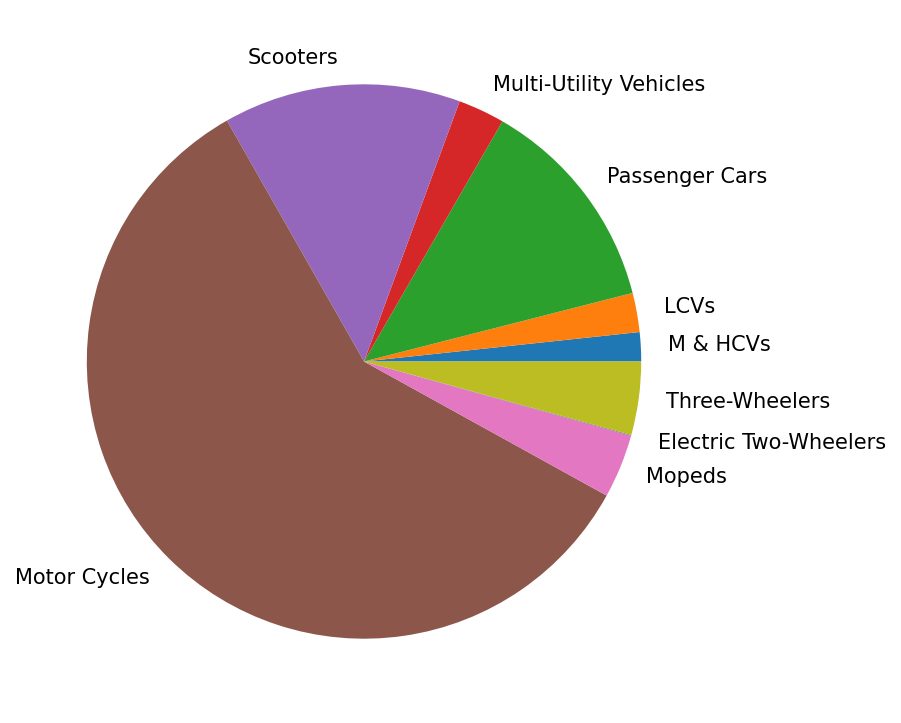

In [ ]:
plt.figure(figsize=(8,6),dpi=150)

data['Total Vehicles'] = data.iloc[:, 1:10].sum(axis=1)

data = data[data['Category']!='GRAND TOTAL']
data = data[data['Category']!='Total Two-Wheelers']
data = data[data['Category']!='Total Commercial Vehicles']
plt.pie(data["Total Vehicles"], labels = data["Category"])
plt.show()

In [ ]:
"""
Inference from Pie Chart -

1. From the above plot, we can infer that the maximum sold vehicle category was 'Motorcycles' followed by 'Scooters'
and 'Passenger Cars' with Electric Two-wheelers being the least sold vehicle category.
"""

# Word Cloud

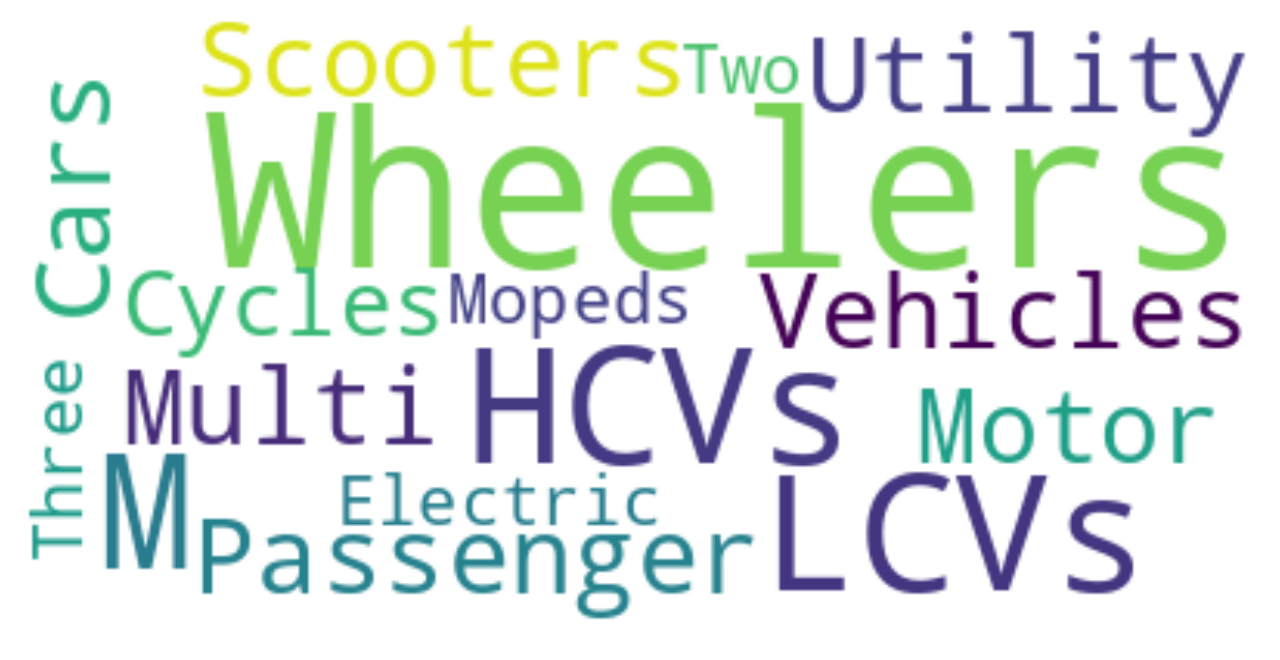

In [ ]:
plt.figure(figsize=(8,6),dpi=200)

# Creating the text variable
text = " ".join(title for title in data.Category)
# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()